In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the column names
df.head(), df.columns

(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG       F              0     Yes         No     1.0           No   
 1  5575-GNVDE    Male              0      No         No    34.0          Yes   
 2  3668-QPYBK    Male              0      No         No     2.0          Yes   
 3  7795-CFOCW    Male              0      No         No    45.0           No   
 4  9237-HQITU  Female              0      No         No     2.0          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import pandas as pd

# Handling missing values
# Fill missing gender with mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['gender'] = df['gender'].replace('M', 'Male').replace('F', 'Female')

# Fill missing tenure with median
df['tenure'].fillna(df['tenure'].median(), inplace=True)

# Convert TotalCharges to numeric, forcing errors to NaN (to handle possible non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any NaN values in TotalCharges and handle them
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert SeniorCitizen to boolean
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# Convert appropriate columns to 'category' dtype
category_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in category_cols:
    df[col] = df[col].astype('category')

# Display the first few rows of the cleaned and transformed dataset
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female          False     Yes         No     1.0           No   
1  5575-GNVDE    Male          False      No         No    34.0          Yes   
2  3668-QPYBK    Male          False      No         No     2.0          Yes   
3  7795-CFOCW    Male          False      No         No    45.0           No   
4  9237-HQITU  Female          False      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Removing duplicates if any
df.drop_duplicates(inplace=True)

# Check for invalid values or outliers
summary_stats = df.describe(include='all')

# Convert categorical columns to numeric using one-hot encoding for integration with data science models
df_encoded = pd.get_dummies(df, drop_first=True)

# Save the cleaned and transformed dataset to a new CSV file
output_path = 'Telco-Customer-Churn-Cleaned.csv'
df_encoded.to_csv(output_path, index=False)

# Display results
summary_stats, duplicates, df_encoded.head()

(        customerID gender SeniorCitizen Partner Dependents       tenure  \
 count         7043   7043          7043    7043       7043  7043.000000   
 unique        7043      2             2       2          2          NaN   
 top     7590-VHVEG   Male         False      No         No          NaN   
 freq             1   3558          5901    3641       4933          NaN   
 mean           NaN    NaN           NaN     NaN        NaN    35.041318   
 std            NaN    NaN           NaN     NaN        NaN   115.258379   
 min            NaN    NaN           NaN     NaN        NaN     0.000000   
 25%            NaN    NaN           NaN     NaN        NaN     9.000000   
 50%            NaN    NaN           NaN     NaN        NaN    29.000000   
 75%            NaN    NaN           NaN     NaN        NaN    55.000000   
 max            NaN    NaN           NaN     NaN        NaN  7100.000000   
 
        PhoneService MultipleLines InternetService OnlineSecurity  ...  \
 count      

In [ ]:
# Display the data types of each column
data_types = df.dtypes
data_types


customerID            object
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

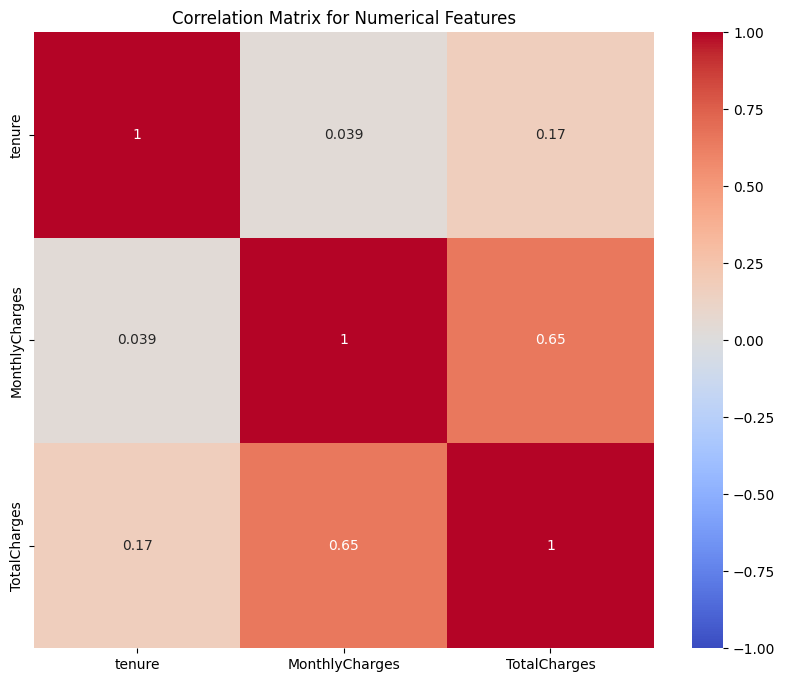

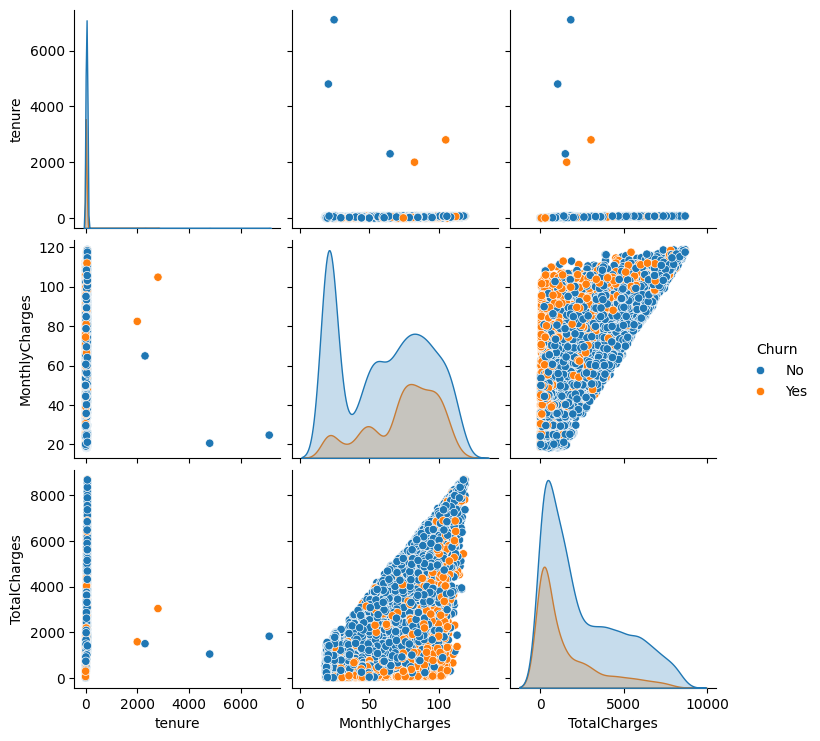

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.038652,0.170405
MonthlyCharges,0.038652,1.000000,0.650864
TotalCharges,0.170405,0.650864,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical features
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Example pair plot for numerical and categorical features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

# Display correlation matrix
correlation_matrix

In [ ]:
# Descriptive statistics for numerical columns
numeric_summary = df.describe()

# Descriptive statistics for categorical columns
categorical_summary = df.describe(include=['category'])

numeric_summary, categorical_summary


(            tenure  MonthlyCharges  TotalCharges
 count  7043.000000     7043.000000   7043.000000
 mean     35.041318       64.761692   2281.916928
 std     115.258379       30.090047   2265.270398
 min       0.000000       18.250000     18.800000
 25%       9.000000       35.500000    402.225000
 50%      29.000000       70.350000   1397.475000
 75%      55.000000       89.850000   3786.600000
 max    7100.000000      118.750000   8684.800000,
        gender Partner Dependents PhoneService MultipleLines InternetService  \
 count    7043    7043       7043         7043          7043            7043   
 unique      2       2          2            2             3               3   
 top      Male      No         No          Yes            No     Fiber optic   
 freq     3558    3641       4933         6361          3390            3096   
 
        OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
 count            7043         7043             7043        7043   

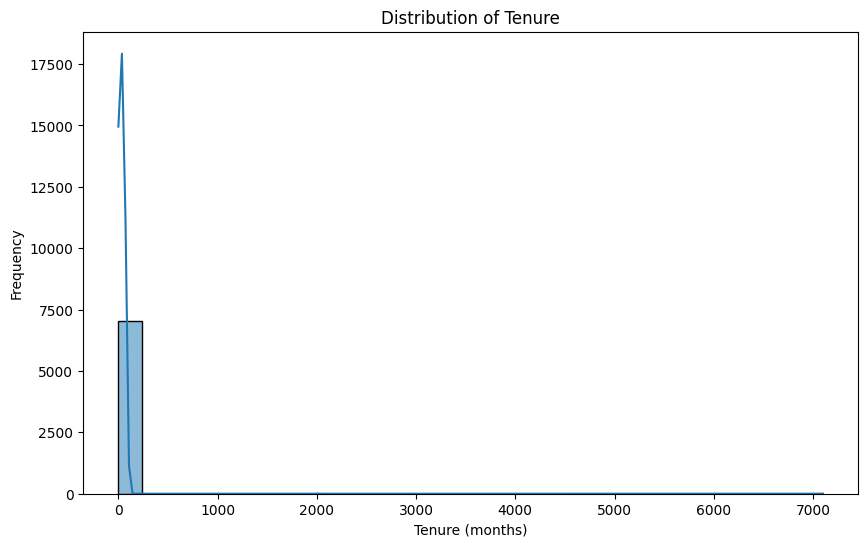

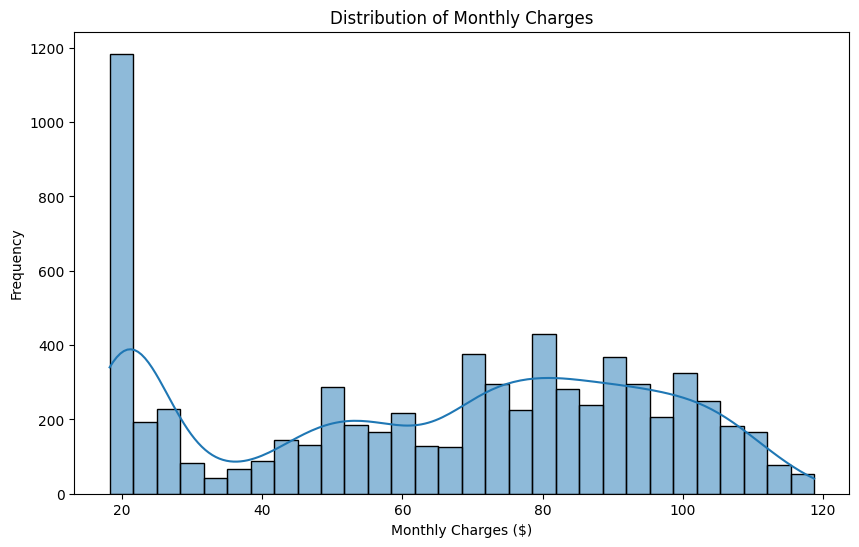

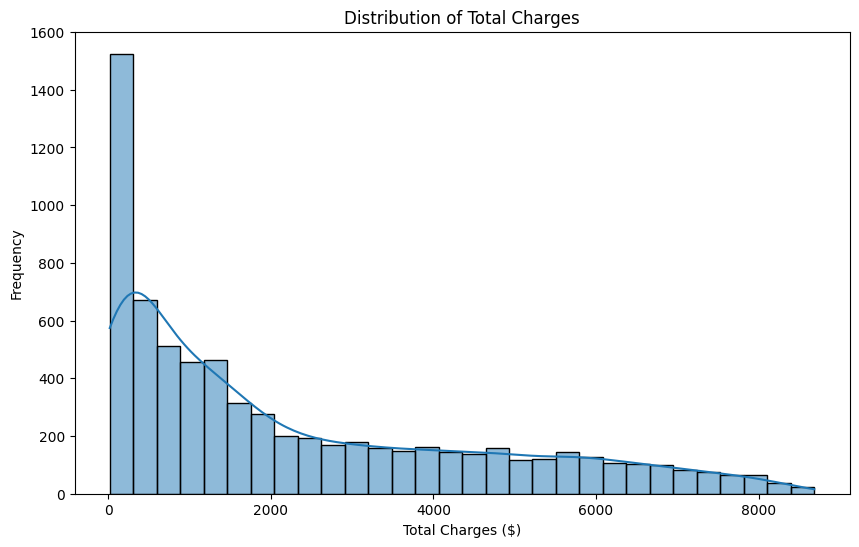

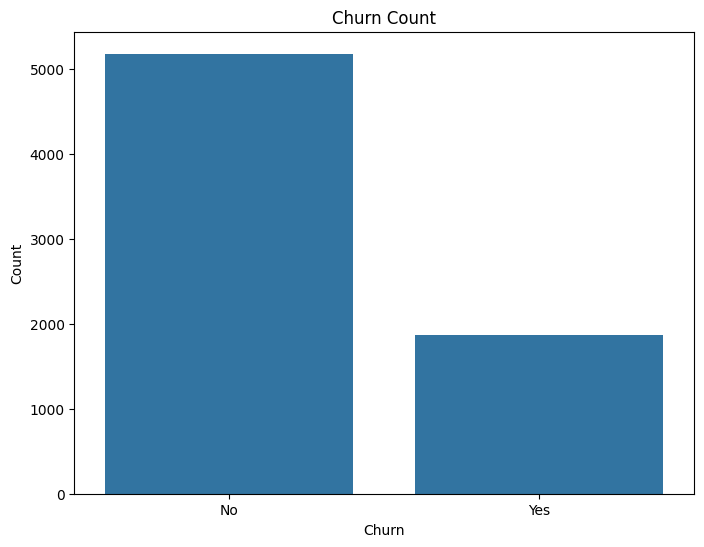

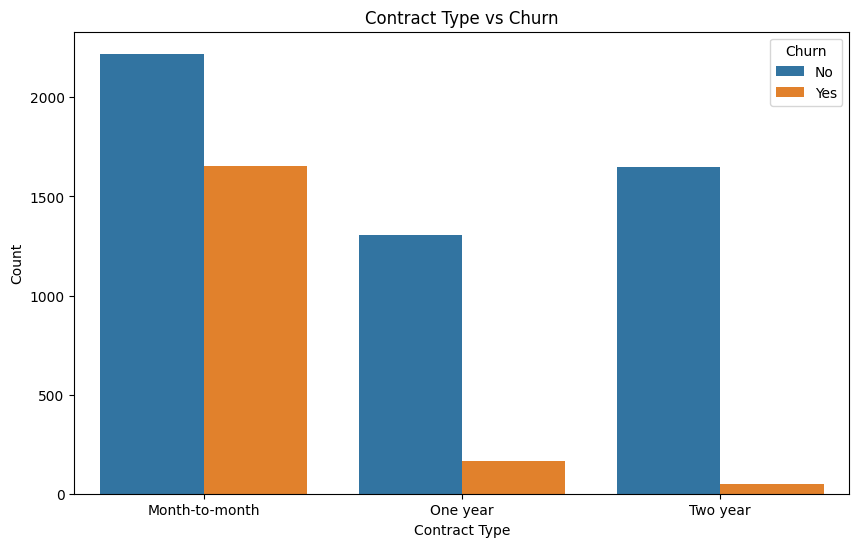

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

# Count plot for Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Count plot for Contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Periksa nilai yang hilang
missing_values = df.isnull().sum()

# Periksa tipe data setiap kolom
data_types = df.dtypes

missing_values, data_types


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 customerID            object
 gender              category
 SeniorCitizen           bool
 Partner             category
 Dependents          category
 tenure               float64
 PhoneService        category
 MultipleLines       category
 InternetService     category
 OnlineSecurity      category
 OnlineBackup        category
 DeviceProtection    category
 TechSupport         category
 StreamingTV         category
 StreamingMovies     category
 Contract            category
 PaperlessBilling    c

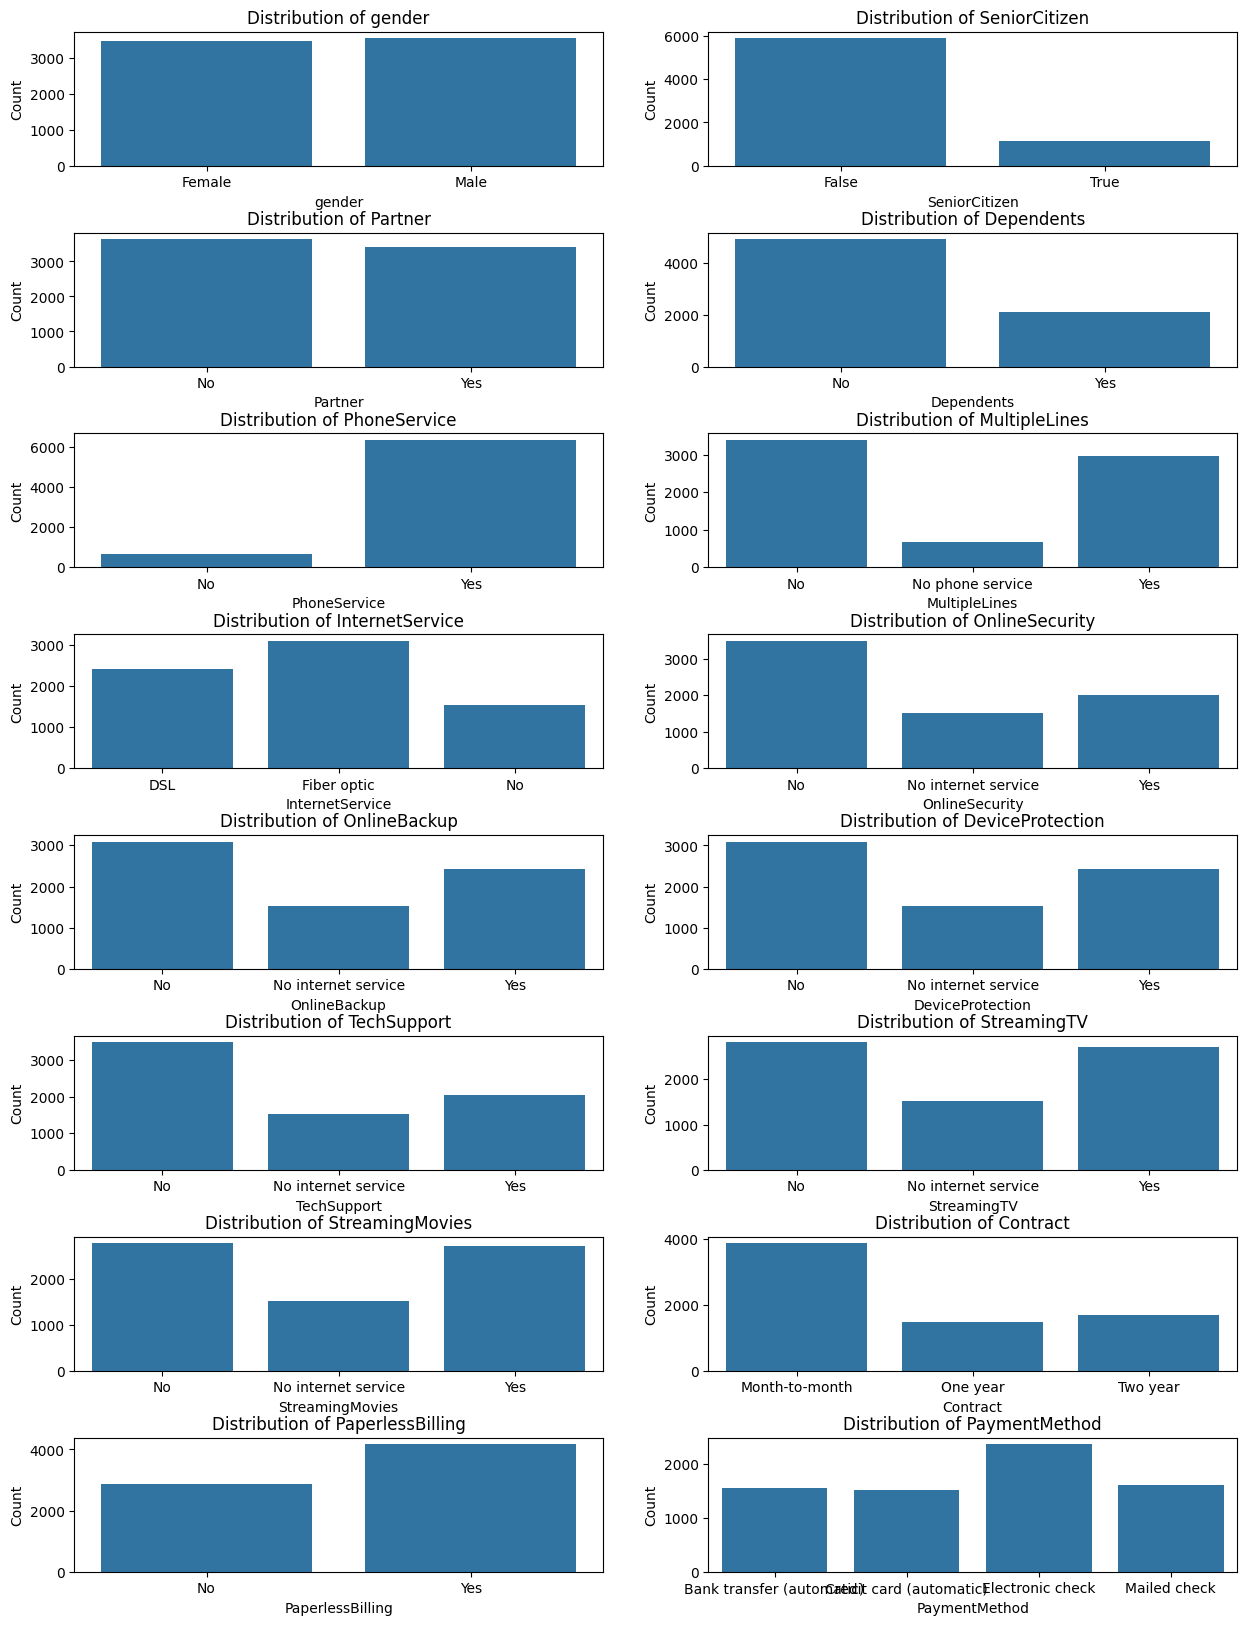

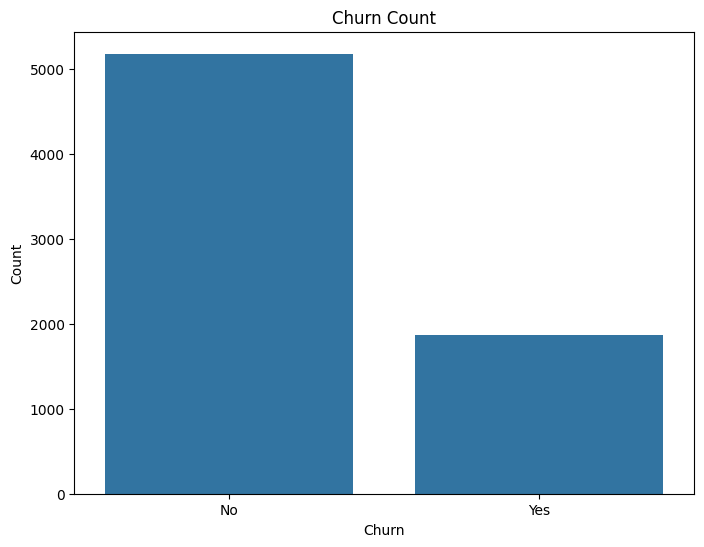

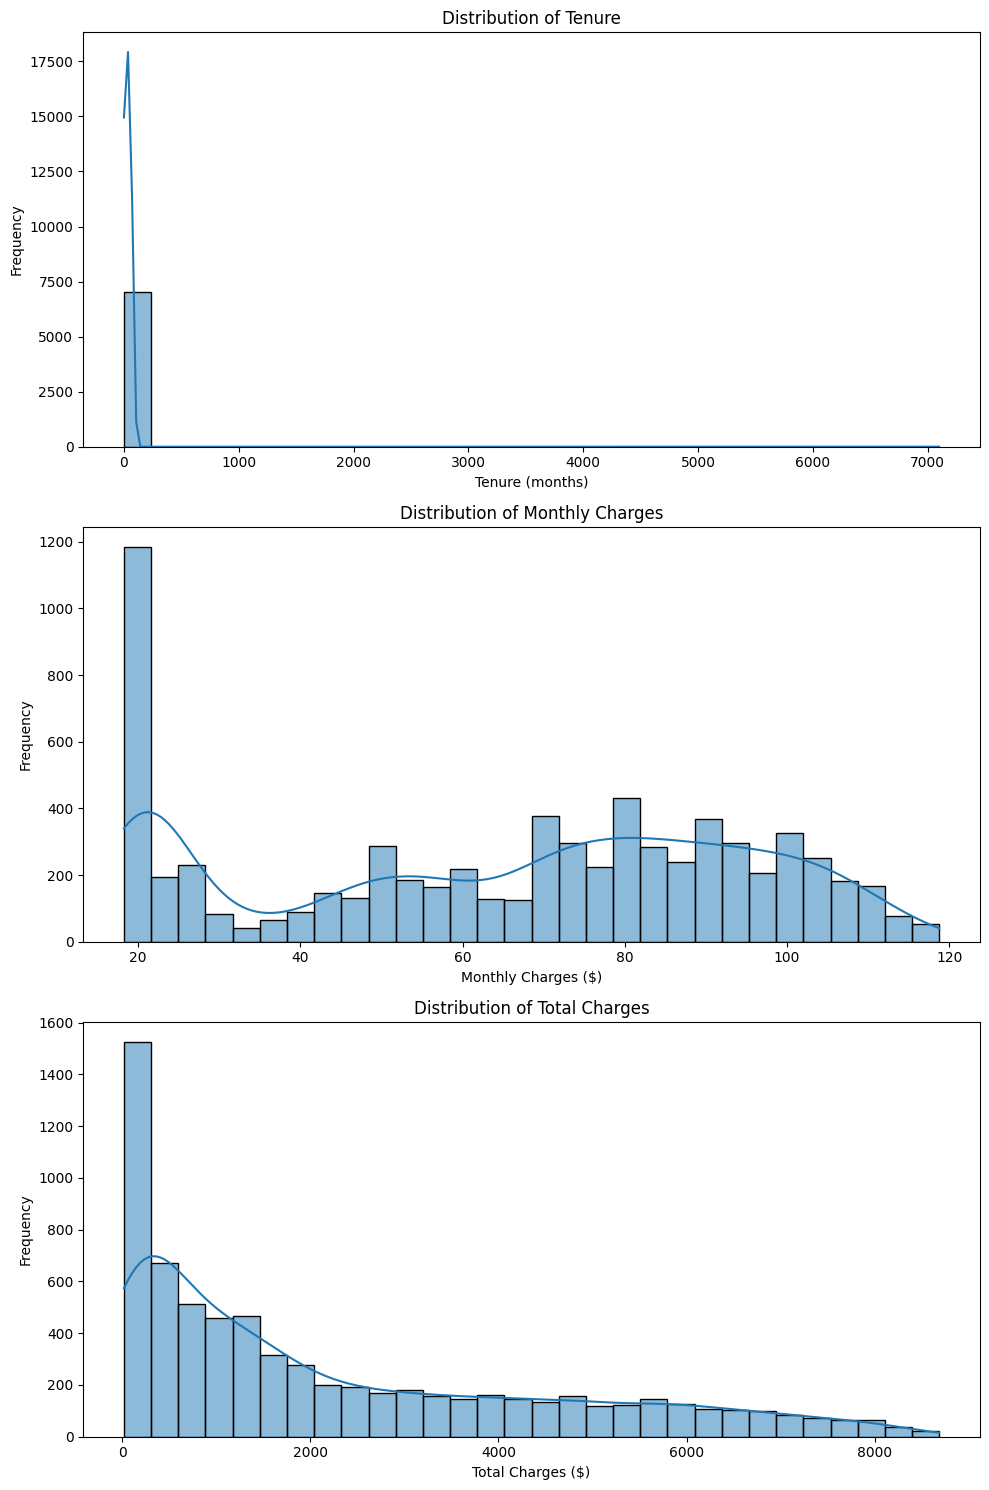

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns excluding 'Churn'
category_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Number of categorical columns
num_category_cols = len(category_cols)

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (num_category_cols + 1) // num_cols

# Visualisasi distribusi kolom kategoris utama
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(category_cols):
    sns.countplot(data=df, x=col, ax=axs[i//num_cols, i%num_cols])
    axs[i//num_cols, i%num_cols].set_title(f'Distribution of {col}')
    axs[i//num_cols, i%num_cols].set_xlabel(col)
    axs[i//num_cols, i%num_cols].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

# Visualisasi distribusi kolom 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Distribusi kolom numerik
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(df['tenure'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Tenure')
axs[0].set_xlabel('Tenure (months)')
axs[0].set_ylabel('Frequency')

sns.histplot(df['MonthlyCharges'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Monthly Charges')
axs[1].set_xlabel('Monthly Charges ($)')
axs[1].set_ylabel('Frequency')

sns.histplot(df['TotalCharges'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Total Charges')
axs[2].set_xlabel('Total Charges ($)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Stratified sampling untuk memastikan representasi churn
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Churn'], random_state=42)

                             feature  importance
0                        num__tenure    0.178359
2                  num__TotalCharges    0.160484
1                num__MonthlyCharges    0.148060
25            cat__Contract_Two year    0.060344
10  cat__InternetService_Fiber optic    0.047425
13           cat__OnlineSecurity_Yes    0.045362
24            cat__Contract_One year    0.038253
19              cat__TechSupport_Yes    0.035667
26         cat__PaperlessBilling_Yes    0.032258
3                   cat__gender_Male    0.029196


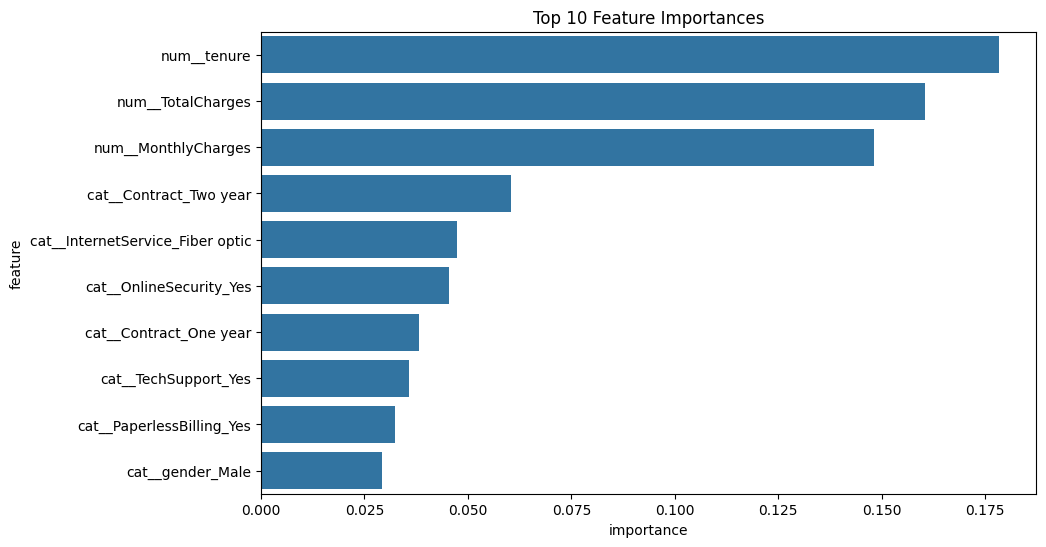

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Select only relevant columns for analysis
selected_attributes = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
    'TotalCharges', 'Churn'
]
df_selected = df[selected_attributes]

# One-Hot Encoding for categorical features
categorical_features = category_cols[:-1]  # Excluding 'Churn'
onehot_encoder = OneHotEncoder(drop='first')

# Scaling for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

# Column transformer for combining preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', onehot_encoder, categorical_features)
    ])

# Pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocessing data
X = df_selected.drop(columns=['Churn'])
y = df_selected['Churn'].cat.codes

# Apply preprocessing pipeline
X_preprocessed = pipeline.fit_transform(X)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Feature Selection using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Getting feature importances
feature_importances = model.feature_importances_

# Get the column names after preprocessing
preprocessed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': preprocessed_feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Display top 10 features
top_features = feature_importances_df.head(10)
print(top_features)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 Feature Importances')
plt.show()

gender
Male      3558
Female    3485
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


StreamingTV
No       

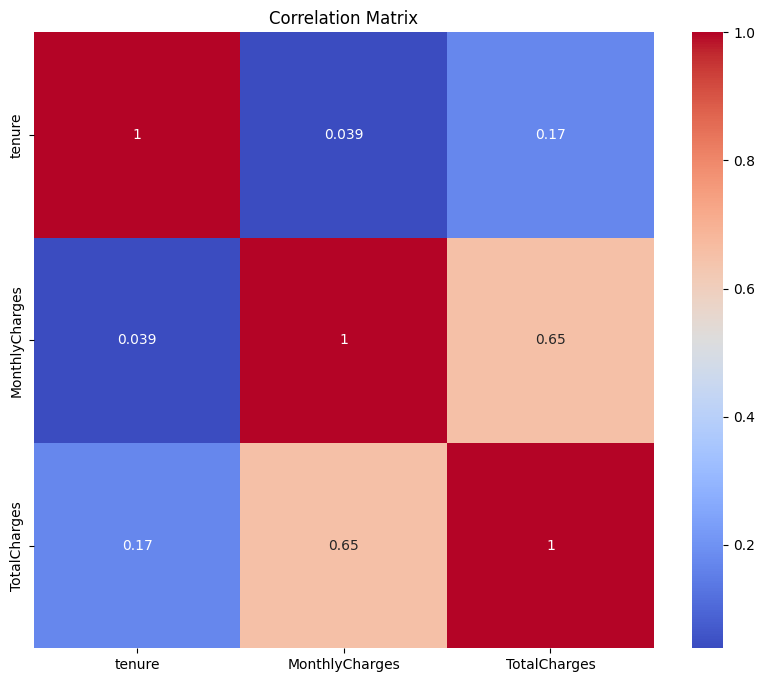

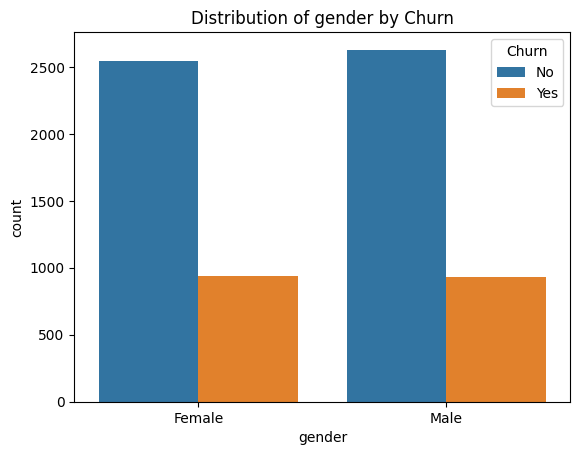

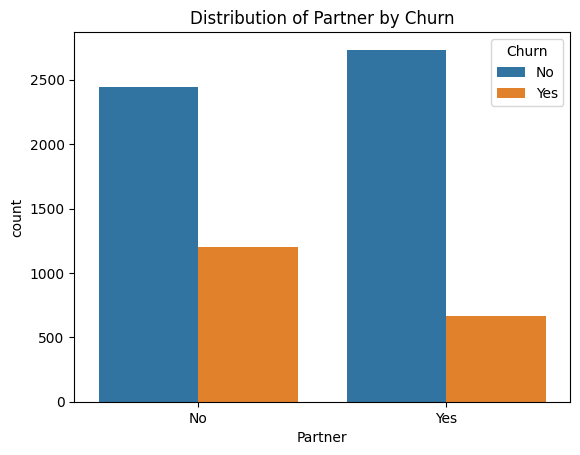

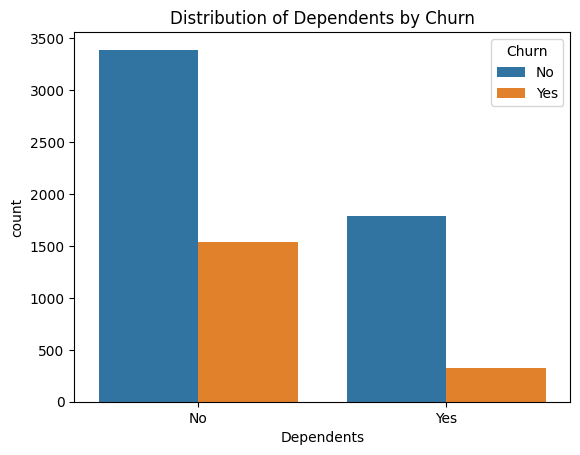

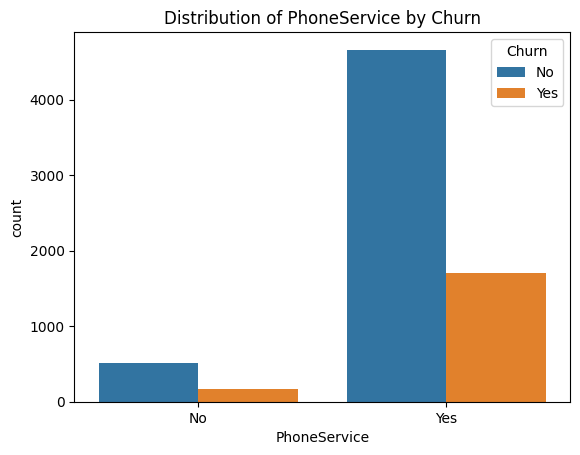

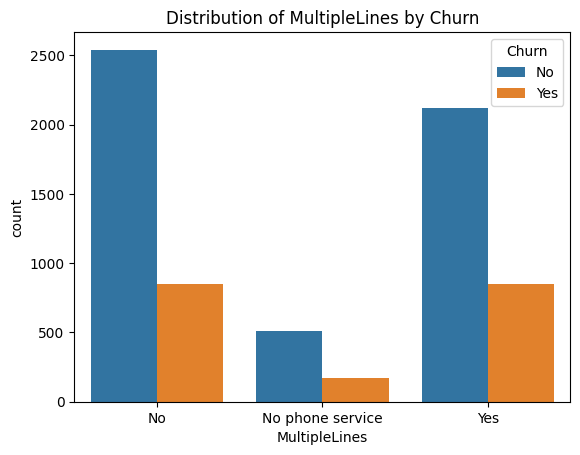

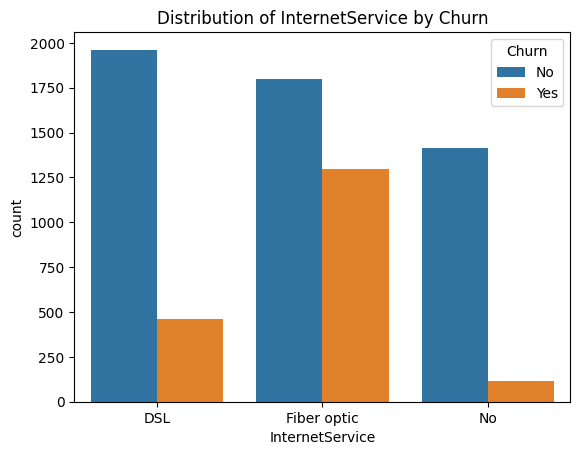

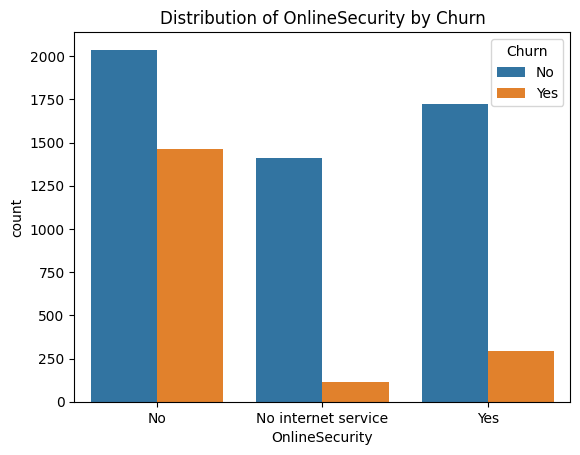

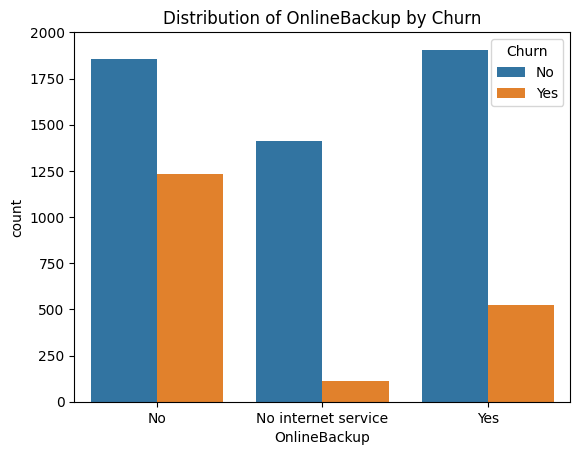

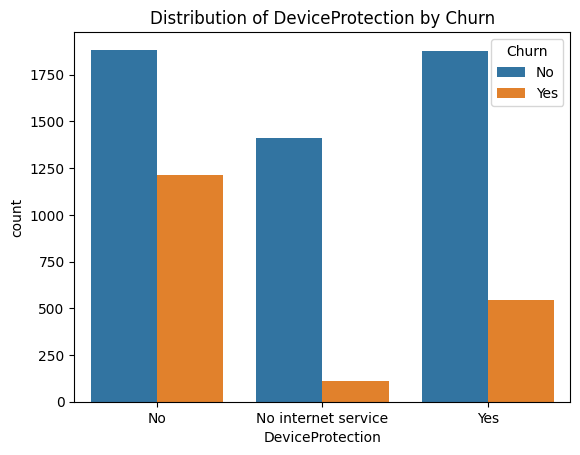

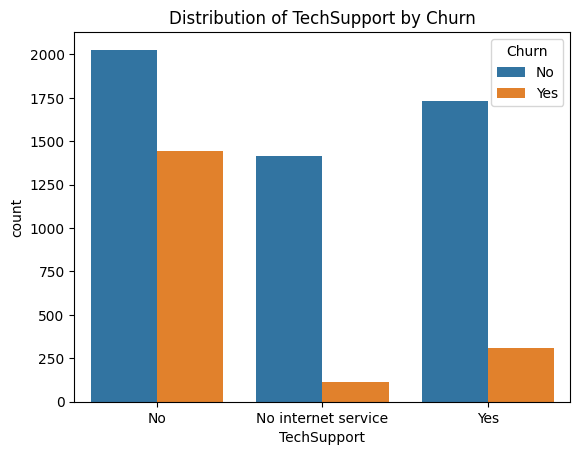

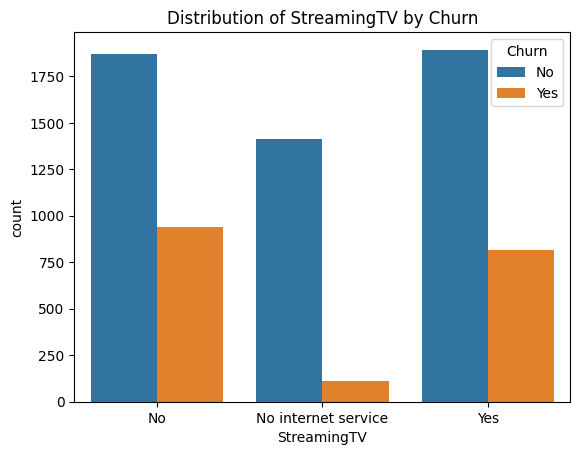

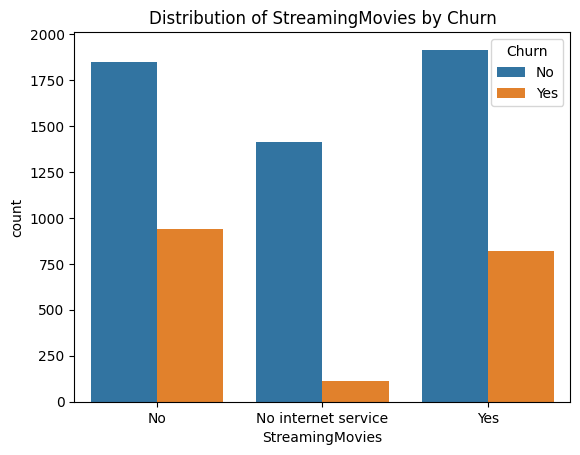

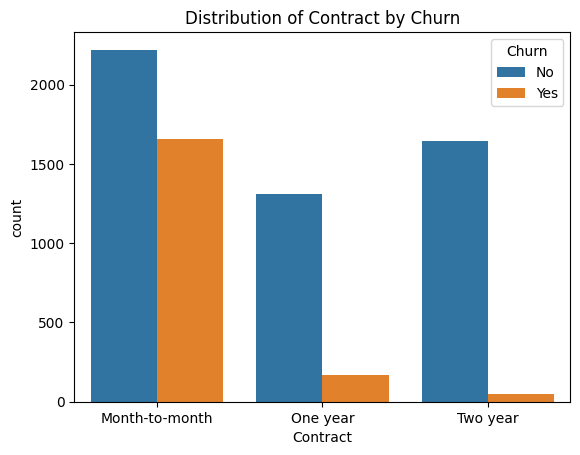

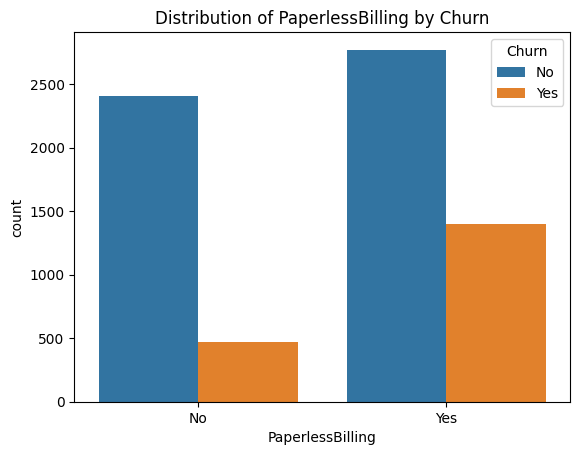

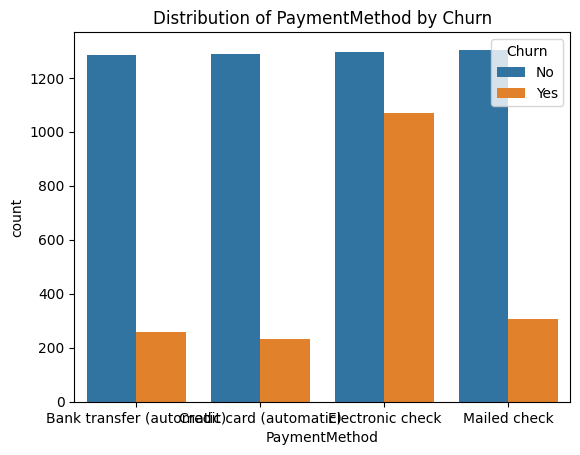

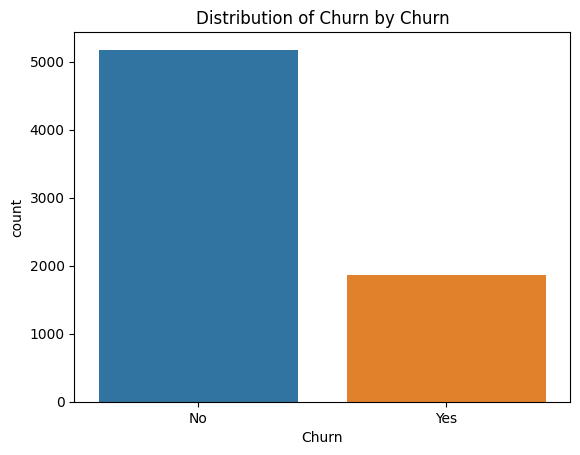

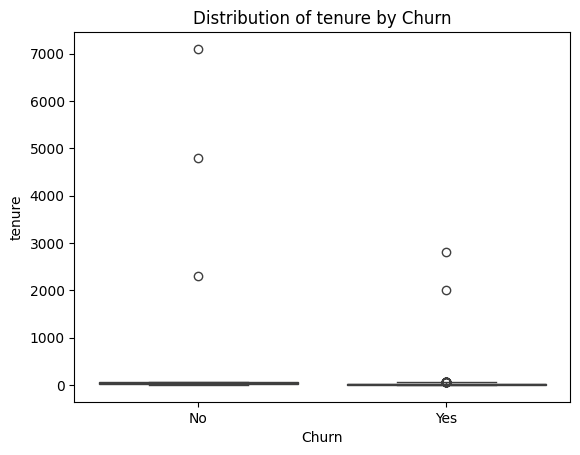

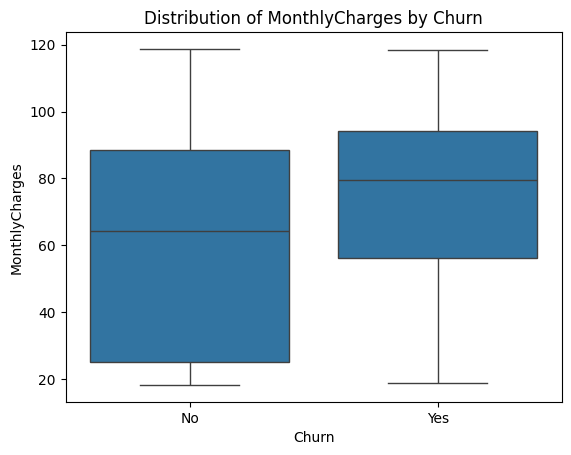

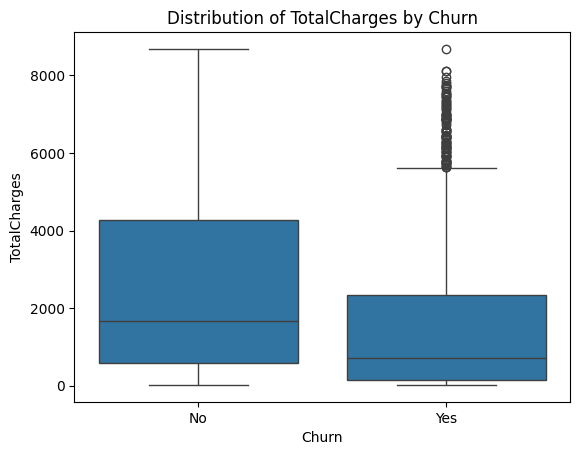

In [ ]:
# Analyze the data
# 1. Descriptive analysis of categorical features
categorical_features = df.select_dtypes(include=['category'])
for col in categorical_features.columns:
    print(df[col].value_counts())
    print("\n")

# 2. Descriptive analysis of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
print(numerical_features.describe())

# 3. Correlation analysis
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Analyze the influence of features on Churn
# Categorical features
for col in categorical_features.columns:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

# Numerical features
for col in numerical_features.columns:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

In [ ]:
# Define the label 'Churn' based on SOP
# Assume 'Churn' column already contains the labels 'Yes' and 'No'
df['Churn'] = df['Churn'].astype('category')

# Check for any inconsistencies or missing labels
missing_labels = df['Churn'].isnull().sum()
print(f"Missing labels: {missing_labels}")

# Ensure all labels are valid categories 'Yes' or 'No'
valid_labels = df['Churn'].isin(['Yes', 'No']).all()
print(f"All labels are valid: {valid_labels}")

# Implement quality control measures
# Example: Double-check a random sample of data points
sample_size = 100
random_sample = df.sample(sample_size)
print(random_sample[['customerID', 'Churn']])

# Display the first few rows to verify
print(df.head())


Missing labels: 0
All labels are valid: True
      customerID Churn
5929  5828-DWPIL    No
630   5099-BAILX   Yes
333   0122-OAHPZ   Yes
170   7654-YWJUF    No
5333  3143-JQEGI   Yes
...          ...   ...
6197  1585-MQSSU   Yes
4679  8218-FFJDS    No
4040  9581-GVBXT    No
1166  7129-ACFOG    No
5387  8676-OOQEJ    No

[100 rows x 2 columns]
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female          False     Yes         No     1.0           No   
1  5575-GNVDE    Male          False      No         No    34.0          Yes   
2  3668-QPYBK    Male          False      No         No     2.0          Yes   
3  7795-CFOCW    Male          False      No         No    45.0           No   
4  9237-HQITU  Female          False      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values in 'TotalCharges' and convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert categorical columns to category type
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert categorical columns to numerical codes
for col in categorical_columns:
    df[col] = df[col].cat.codes

# Split the data into training and testing sets
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Random Forest - Accuracy: {accuracy:.2f}")
print(f"Random Forest - Precision: {precision:.2f}")
print(f"Random Forest - Recall: {recall:.2f}")
print(f"Random Forest - F1 Score: {f1:.2f}")
print(f"Random Forest - AUC-ROC: {roc_auc:.2f}")

Random Forest - Accuracy: 0.80
Random Forest - Precision: 0.66
Random Forest - Recall: 0.47
Random Forest - F1 Score: 0.55
Random Forest - AUC-ROC: 0.84


In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(25)

# Number of samples in the new dataset
num_samples = 100

# Generate random data for each column based on original data distributions

# Gender (0: Female, 1: Male)
gender = np.random.choice([0, 1], num_samples)

# SeniorCitizen (0: No, 1: Yes)
SeniorCitizen = np.random.choice([0, 1], num_samples)

# Partner (0: No, 1: Yes)
Partner = np.random.choice([0, 1], num_samples)

# Dependents (0: No, 1: Yes)
Dependents = np.random.choice([0, 1], num_samples)

# Tenure (0-72 months)
tenure = np.random.randint(0, 73, num_samples)

# PhoneService (0: No, 1: Yes)
PhoneService = np.random.choice([0, 1], num_samples)

# MultipleLines (0: No, 1: Yes)
MultipleLines = np.random.choice([0, 1, 2], num_samples)

# InternetService (0: DSL, 1: Fiber optic, 2: No)
InternetService = np.random.choice([0, 1, 2], num_samples)

# OnlineSecurity (0: No, 1: Yes)
OnlineSecurity = np.random.choice([0, 1, 2], num_samples)

# OnlineBackup (0: No, 1: Yes)
OnlineBackup = np.random.choice([0, 1, 2], num_samples)

# DeviceProtection (0: No, 1: Yes)
DeviceProtection = np.random.choice([0, 1, 2], num_samples)

# TechSupport (0: No, 1: Yes)
TechSupport = np.random.choice([0, 1, 2], num_samples)

# StreamingTV (0: No, 1: Yes)
StreamingTV = np.random.choice([0, 1, 2], num_samples)

# StreamingMovies (0: No, 1: Yes)
StreamingMovies = np.random.choice([0, 1, 2], num_samples)

# Contract (0: Month-to-month, 1: One year, 2: Two year)
Contract = np.random.choice([0, 1, 2], num_samples)

# PaperlessBilling (0: No, 1: Yes)
PaperlessBilling = np.random.choice([0, 1], num_samples)

# PaymentMethod (0: Bank transfer (automatic), 1: Credit card (automatic), 2: Electronic check, 3: Mailed check)
PaymentMethod = np.random.choice([0, 1, 2, 3], num_samples)

# MonthlyCharges (20-120 USD)
MonthlyCharges = np.random.uniform(20, 120, num_samples)

# TotalCharges (tenure * MonthlyCharges, with some noise)
TotalCharges = tenure * MonthlyCharges + np.random.normal(0, 10, num_samples)

# Churn (0: No, 1: Yes) - Random for new data (actual labels)
Churn = np.random.choice([0, 1], num_samples)

# Create DataFrame
new_data = pd.DataFrame({
    'gender': gender,
    'SeniorCitizen': SeniorCitizen,
    'Partner': Partner,
    'Dependents': Dependents,
    'tenure': tenure,
    'PhoneService': PhoneService,
    'MultipleLines': MultipleLines,
    'InternetService': InternetService,
    'OnlineSecurity': OnlineSecurity,
    'OnlineBackup': OnlineBackup,
    'DeviceProtection': DeviceProtection,
    'TechSupport': TechSupport,
    'StreamingTV': StreamingTV,
    'StreamingMovies': StreamingMovies,
    'Contract': Contract,
    'PaperlessBilling': PaperlessBilling,
    'PaymentMethod': PaymentMethod,
    'MonthlyCharges': MonthlyCharges,
    'TotalCharges': TotalCharges,
    'Churn': Churn
})


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X = new_data.drop(columns=['Churn'])
y = new_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Random Forest - Accuracy: {accuracy:.2f}")
print(f"Random Forest - Precision: {precision:.2f}")
print(f"Random Forest - Recall: {recall:.2f}")
print(f"Random Forest - F1 Score: {f1:.2f}")
print(f"Random Forest - AUC-ROC: {roc_auc:.2f}")

Random Forest - Accuracy: 0.75
Random Forest - Precision: 0.75
Random Forest - Recall: 0.92
Random Forest - F1 Score: 0.83
Random Forest - AUC-ROC: 0.54


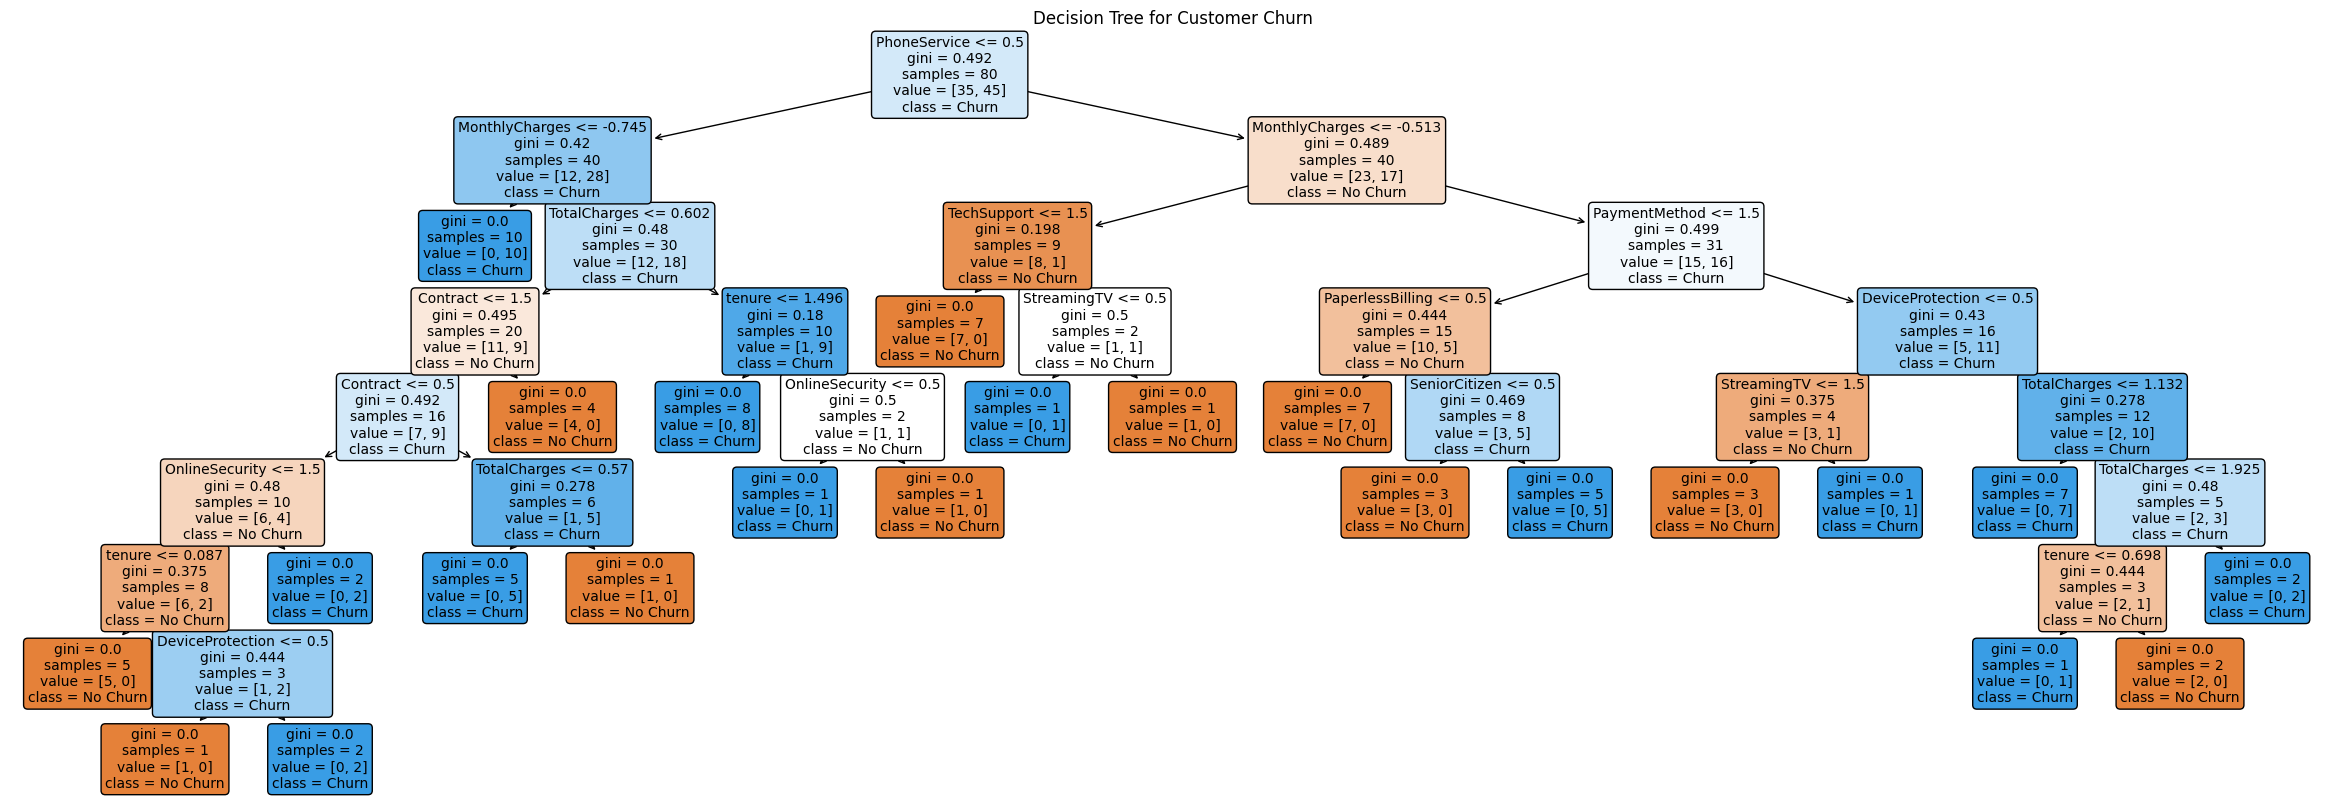

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"], rounded=True, fontsize=10)
plt.title('Decision Tree for Customer Churn')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan variabel target
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Menggunakan SMOTE untuk menangani ketidakseimbangan data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Mendefinisikan parameter grid untuk dicari
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menginisiasi Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Model terbaik
best_dt = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_dt.predict(X_test)

# Evaluasi Metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])

# Menampilkan hasil
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Decision Tree - Accuracy: {accuracy:.2f}")
print(f"Decision Tree - Precision: {precision:.2f}")
print(f"Decision Tree - Recall: {recall:.2f}")
print(f"Decision Tree - F1 Score: {f1:.2f}")
print(f"Decision Tree - AUC-ROC: {roc_auc:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree - Accuracy: 0.73
Decision Tree - Precision: 0.49
Decision Tree - Recall: 0.69
Decision Tree - F1 Score: 0.57
Decision Tree - AUC-ROC: 0.78


In [ ]:
# Split the data into training and testing sets
X = new_data.drop(columns=['Churn'])
y = new_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Decision Tree - Accuracy: {accuracy:.2f}")
print(f"Decision Tree - Precision: {precision:.2f}")
print(f"Decision Tree - Recall: {recall:.2f}")
print(f"Decision Tree - F1 Score: {f1:.2f}")
print(f"Decision Tree - AUC-ROC: {roc_auc:.2f}")

Decision Tree - Accuracy: 0.75
Decision Tree - Precision: 0.79
Decision Tree - Recall: 0.85
Decision Tree - F1 Score: 0.81
Decision Tree - AUC-ROC: 0.71
